In [1]:
pokemon_names = open('pokemon_names.txt', 'r').read().splitlines()

In [2]:
pokemon_names = [name.lower() for name in pokemon_names]

In [3]:
len(pokemon_names)

1025

In [4]:
min(len(name) for name in pokemon_names)

3

In [5]:
max(len(name) for name in pokemon_names)

12

### n_gram

In [6]:
from collections import defaultdict

In [7]:
b_dict = defaultdict(int)
for name in pokemon_names:
    name = ["<s>"] + list(name) + ["<s>"]
    for ch1, ch2 in zip(name, name[1:]):
        bi_gram = (ch1, ch2)
        b_dict[bi_gram] += 1

In [8]:
len(b_dict)

524

In [9]:
b_dict

defaultdict(int,
            {('<s>', 'b'): 55,
             ('b', 'u'): 29,
             ('u', 'l'): 23,
             ('l', 'b'): 6,
             ('b', 'a'): 25,
             ('a', 's'): 40,
             ('s', 'a'): 26,
             ('a', 'u'): 15,
             ('u', 'r'): 51,
             ('r', '<s>'): 83,
             ('<s>', 'i'): 19,
             ('i', 'v'): 9,
             ('v', 'y'): 3,
             ('y', 's'): 4,
             ('<s>', 'v'): 25,
             ('v', 'e'): 18,
             ('e', 'n'): 42,
             ('n', 'u'): 7,
             ('u', 's'): 31,
             ('<s>', 'c'): 86,
             ('c', 'h'): 62,
             ('h', 'a'): 43,
             ('a', 'r'): 123,
             ('r', 'm'): 12,
             ('m', 'a'): 60,
             ('a', 'n'): 98,
             ('n', 'd'): 29,
             ('d', 'e'): 45,
             ('e', 'r'): 81,
             ('m', 'e'): 34,
             ('e', 'l'): 73,
             ('l', 'e'): 102,
             ('e', 'o'): 27,
             ('o', 

In [10]:
sorted(b_dict.items(), key=lambda x: x[1], reverse=True)

[(('e', '<s>'), 152),
 (('<s>', 's'), 135),
 (('a', 'r'), 123),
 (('r', 'a'), 105),
 (('o', 'n'), 104),
 (('l', 'e'), 102),
 (('i', 'n'), 102),
 (('n', '<s>'), 101),
 (('a', 'n'), 98),
 (('a', '<s>'), 93),
 (('r', 'o'), 89),
 (('<s>', 'c'), 86),
 (('r', '<s>'), 83),
 (('o', 'r'), 82),
 (('e', 'r'), 81),
 (('t', '<s>'), 80),
 (('<s>', 'm'), 79),
 (('l', 'i'), 75),
 (('e', 'l'), 73),
 (('s', '<s>'), 69),
 (('<s>', 'g'), 66),
 (('r', 'e'), 65),
 (('<s>', 'p'), 65),
 (('r', 'i'), 64),
 (('<s>', 't'), 64),
 (('l', 'a'), 63),
 (('c', 'h'), 62),
 (('<s>', 'd'), 61),
 (('m', 'a'), 60),
 (('t', 'a'), 59),
 (('o', 'l'), 58),
 (('o', '<s>'), 57),
 (('<s>', 'b'), 55),
 (('i', 'l'), 55),
 (('l', '<s>'), 55),
 (('t', 'o'), 54),
 (('a', 'l'), 54),
 (('y', '<s>'), 52),
 (('u', 'r'), 51),
 (('l', 'o'), 51),
 (('a', 't'), 50),
 (('d', 'o'), 48),
 (('i', 't'), 48),
 (('o', 'o'), 47),
 (('u', 'n'), 46),
 (('d', 'e'), 45),
 (('i', 's'), 45),
 (('<s>', 'a'), 45),
 (('n', 'e'), 45),
 (('g', 'o'), 45),
 (('h'

In [11]:
chars = sorted(list(set("".join(pokemon_names))))

chr_to_idx = {ch: i for i, ch in enumerate(chars)}
chr_to_idx["<s>"] = len(chars)
# chr_to_idx["<E>"] = len(chars) + 2
idx_to_chr = {i: ch for ch, i in chr_to_idx.items()}

In [12]:
import torch

In [13]:
bigram_co_occurrence = torch.zeros((len(chr_to_idx), len(chr_to_idx)), dtype=torch.int32)
for name in pokemon_names:
    name = ["<s>"] + list(name) + ["<s>"]
    for ch1, ch2 in zip(name, name[1:]):
        # print(chr_to_idx[ch1], chr_to_idx[ch2])
        bigram_co_occurrence[chr_to_idx[ch1], chr_to_idx[ch2]] += 1

In [14]:
import matplotlib.pyplot as plt

In [15]:
torch.sum(bigram_co_occurrence)

tensor(8890)

In [16]:
bigram_co_occurrence[-1]

tensor([  0,   0,   0,   0,   0,   0,  45,  55,  86,  61,  26,  40,  66,  34,
         19,   8,  32,  40,  79,  23,  15,  65,   7,  40, 135,  64,   7,  25,
         30,   3,   6,  14,   0,   0,   0,   0], dtype=torch.int32)

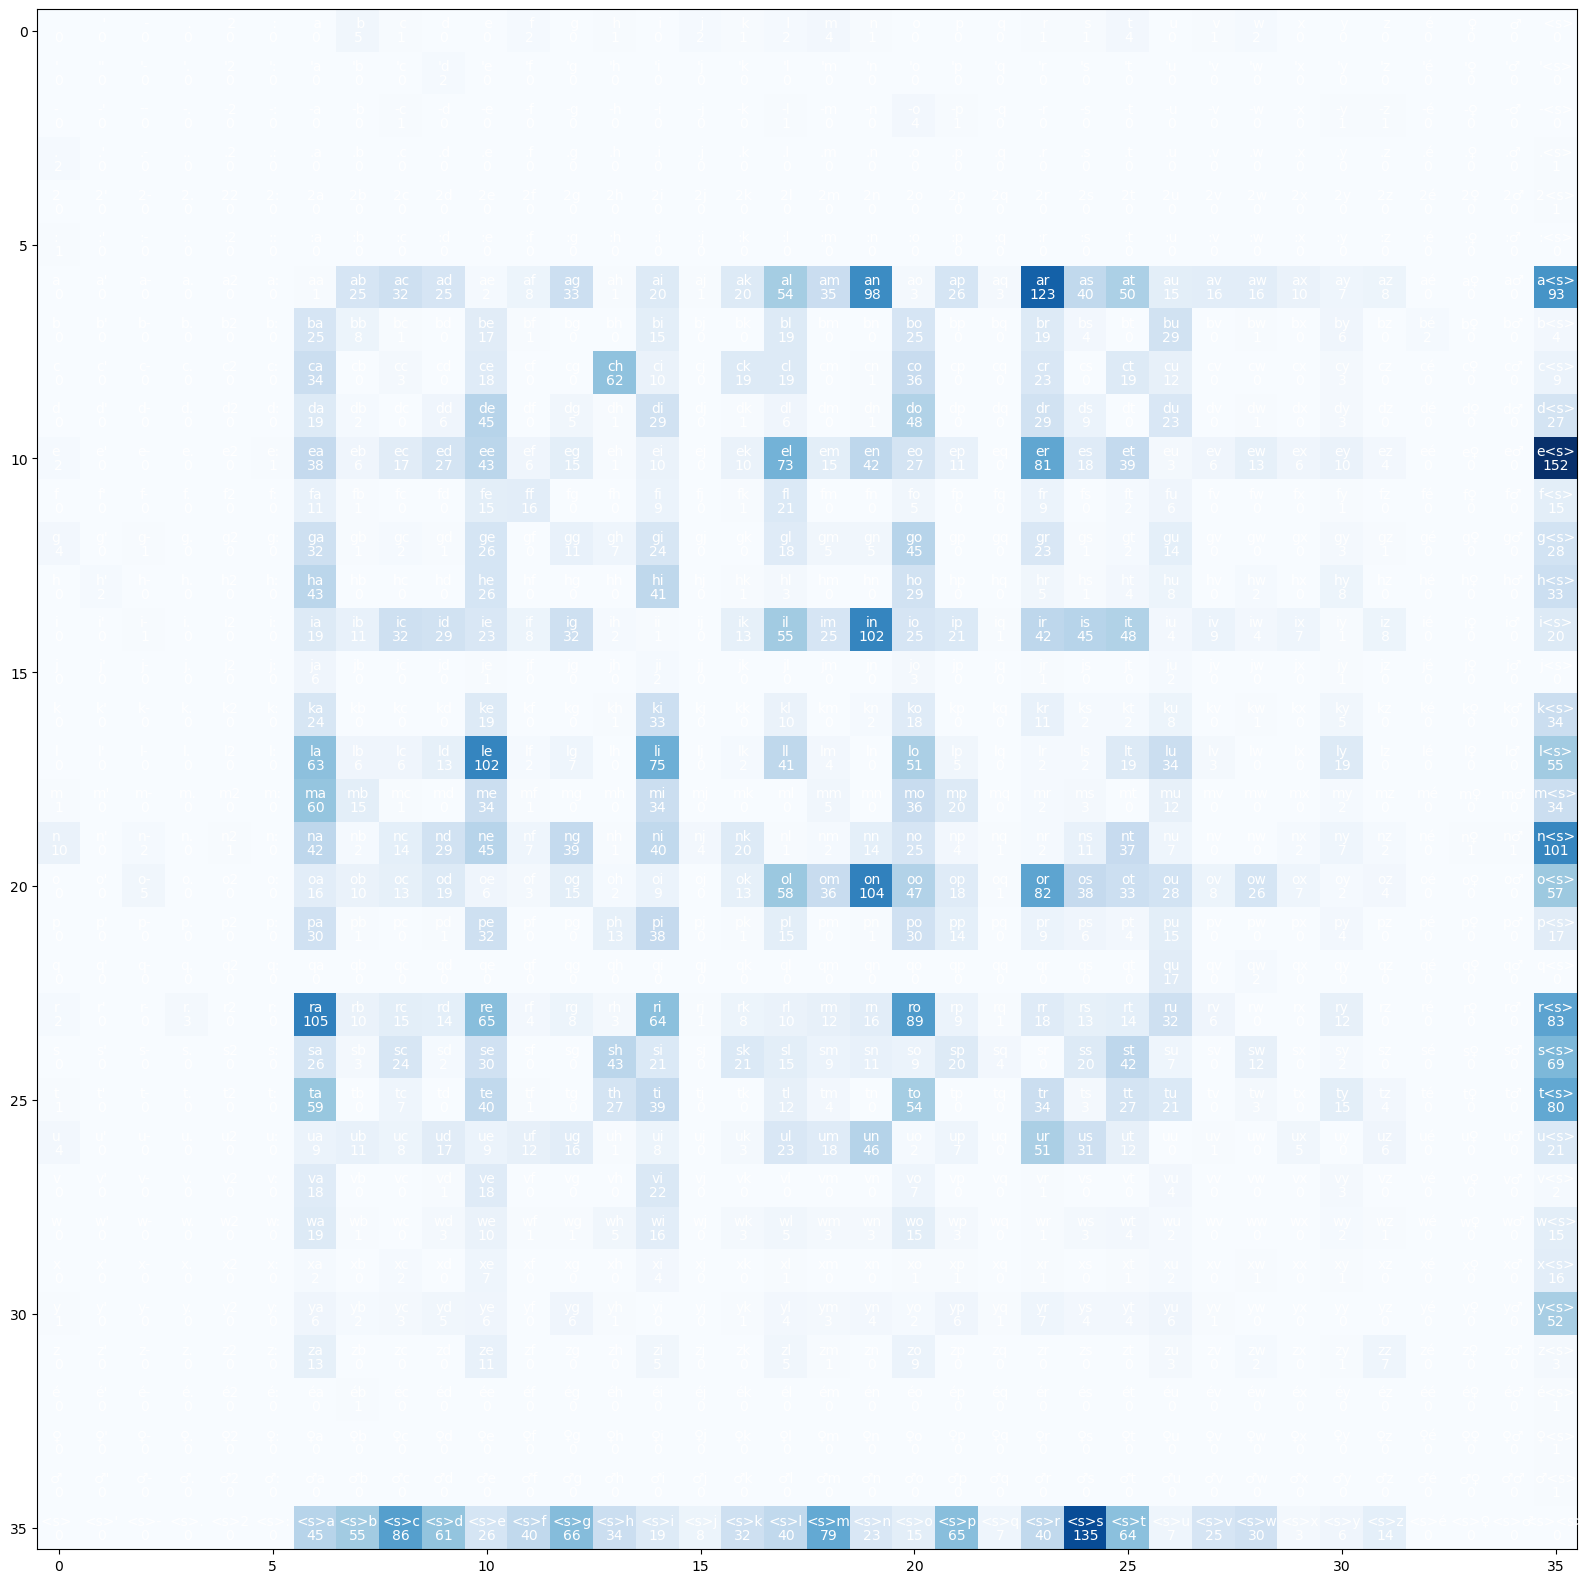

In [17]:
plt.figure(figsize=(20,20))
plt.imshow(bigram_co_occurrence,cmap="Blues")
for i in range(len(chr_to_idx)):
    for j in range(len(chr_to_idx)):
        plt.text(j,i,idx_to_chr[i] + idx_to_chr[j],ha="center",va="bottom",color="w")
        plt.text(j,i,int(bigram_co_occurrence[i,j]),ha="center",va="top",color="w")
plt.show()


In [18]:
bigram_co_occurrence_prob = bigram_co_occurrence.detach().float()
# Probabilities
bigram_co_occurrence_prob /= bigram_co_occurrence_prob.sum(dim=1, keepdim=True).float()

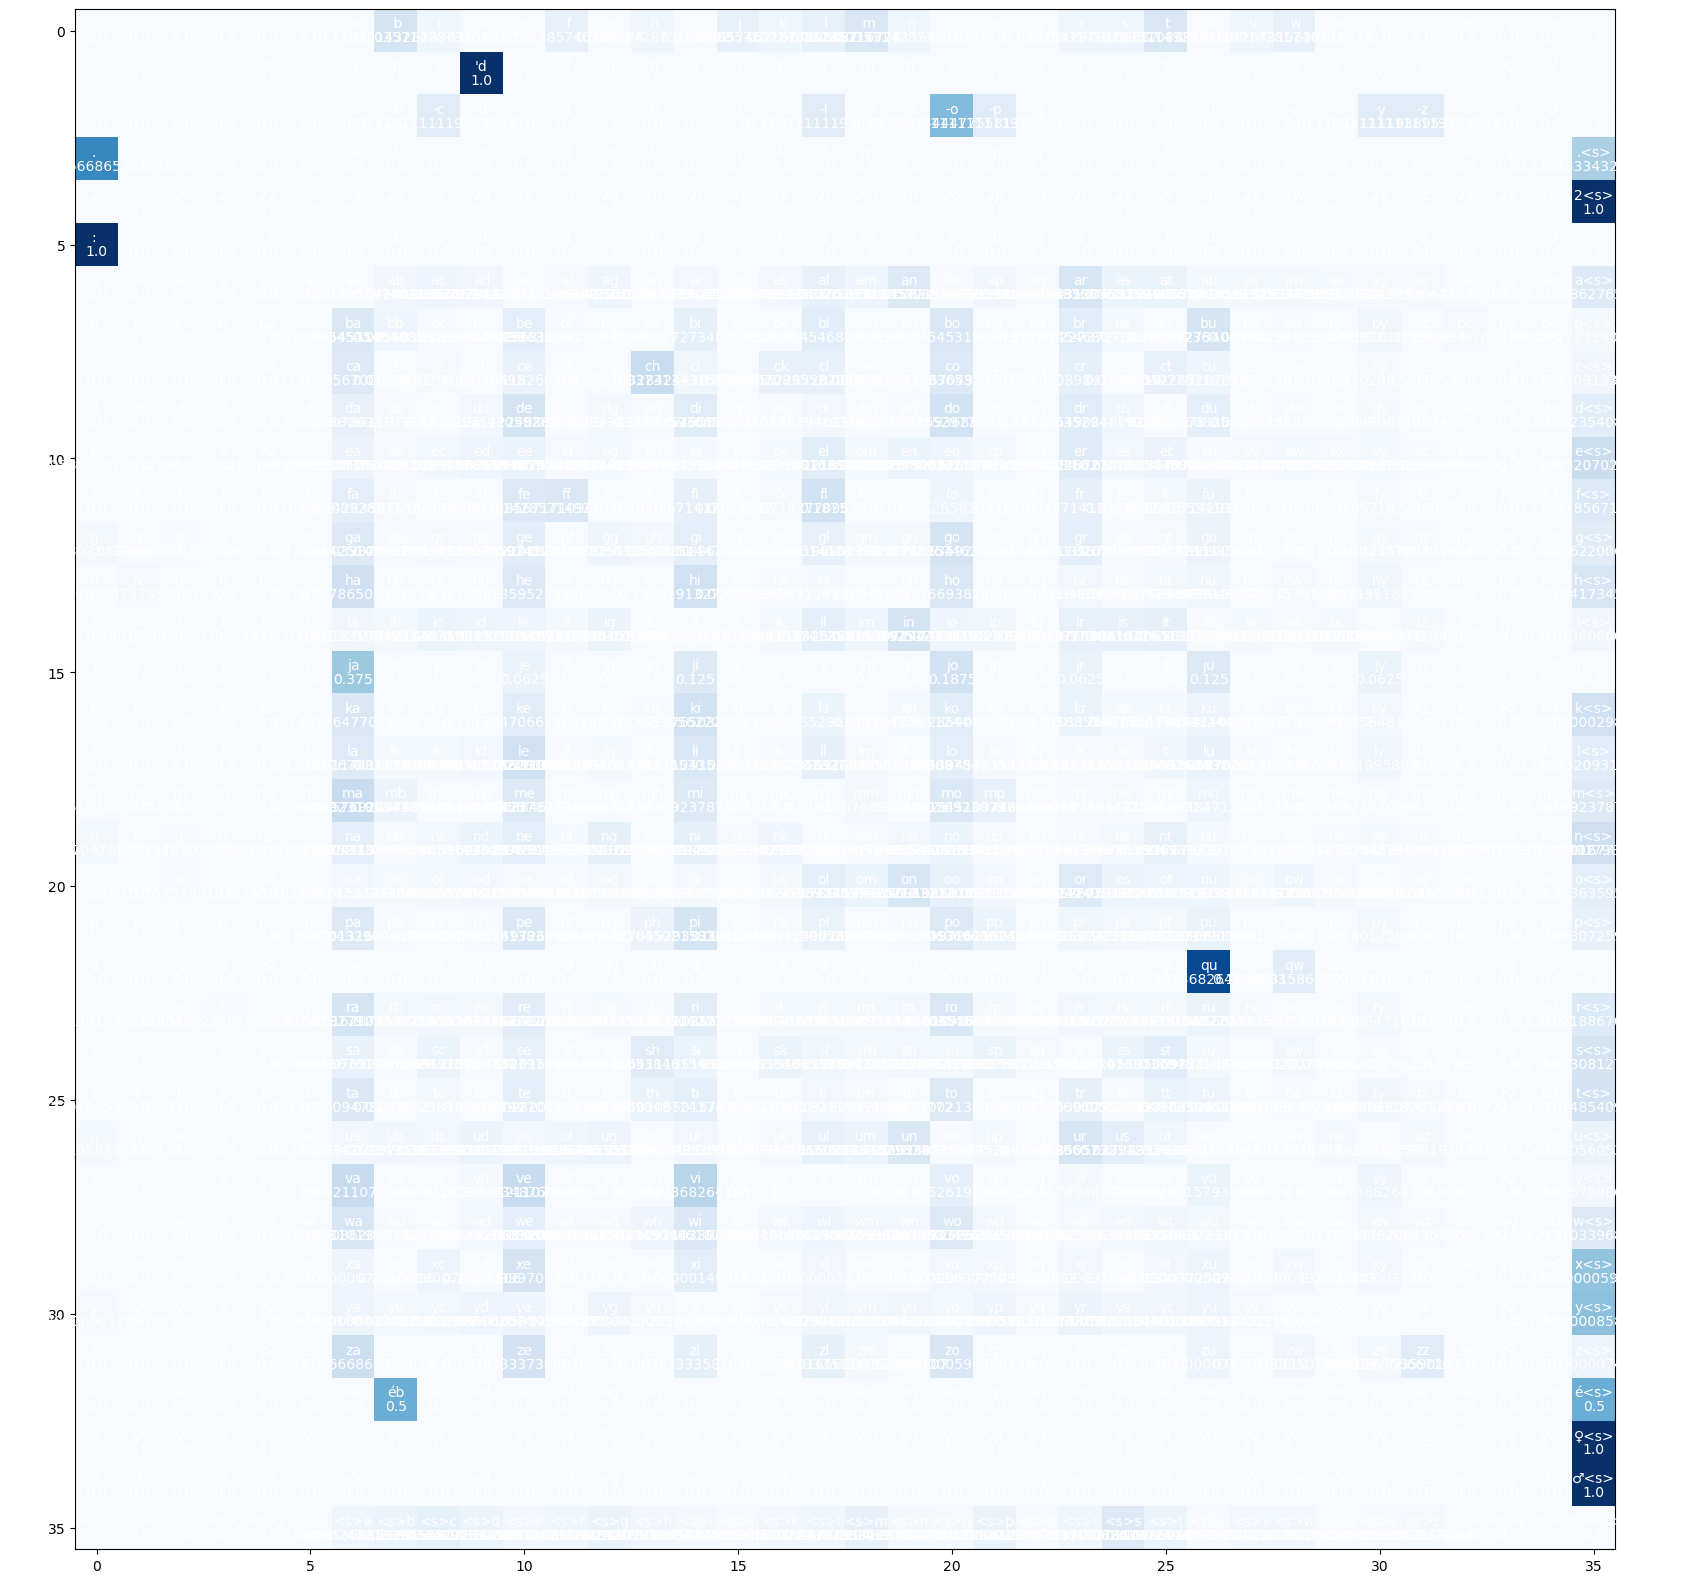

In [23]:
plt.figure(figsize=(20,20))
plt.imshow(bigram_co_occurrence_prob,cmap="Blues")
for i in range(len(chr_to_idx)):
    for j in range(len(chr_to_idx)):
        plt.text(j,i,idx_to_chr[i] + idx_to_chr[j],ha="center",va="bottom",color="w")
        plt.text(j,i,bigram_co_occurrence_prob[i,j].item(),ha="center",va="top",color="w")
        
plt.show()


In [24]:
## Sampling from Uniform Distribution
g = torch.Generator().manual_seed(42)
for i in range(5):
    out = []
    idx = 0
    while True:
        idx = torch.multinomial(torch.ones(len(idx_to_chr),len(idx_to_chr))[idx]/len(idx_to_chr), num_samples=1, generator=g , replacement=True).item()
        
        # idx = torch.multinomial(bigram_co_occurrence_prob[idx], num_samples=1, generator=g).item()
        out.append(idx_to_chr[idx])
        # print(idx_to_chr[idx])
        if idx == 35:
            print("".join(out))
            
            break
            

ss.p♀zobdwomlghsz:-::nyettauaq<s>
':syr ♂nyk.2tn22c é♀.2njqb♂ahyxd<s>
<s>
llw -pz<s>
vkwp<s>


In [25]:
# Sampling based on bigram probabilities
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    idx = 0
    while True:
        # idx = torch.multinomial(torch.ones(len(idx_to_chr),len(idx_to_chr))[idx]/len(idx_to_chr), num_samples=1, generator=g , replacement=True).item()
        idx = torch.multinomial(bigram_co_occurrence_prob[idx], num_samples=1, generator=g, replacement=True).item()
        out.append(idx_to_chr[idx])
        # print(idx_to_chr[idx])
        if idx == 35:
            print("".join(out))
            
            break
            

blam<s>
shaymon<s>
la<s>
fff<s>
matroragiefle<s>


In [94]:
## Calculating how good the n_gram model is on train data
log_likelihood = 0.0
n = 0
for name in pokemon_names:
    name = ["<s>"] + list(name) + ["<s>"]
    for ch1, ch2 in zip(name, name[1:]):
        idx1 = chr_to_idx[ch1]
        idx2 = chr_to_idx[ch2]
        prob = bigram_co_occurrence_prob[idx1, idx2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1
        # print(f"{ch1}{ch2}: {prob:.4f} {log_prob:.4f}")
        
nll = -log_likelihood
print(f"{log_likelihood=}")
print(f"{nll=}")
print(f"{nll/n}")

log_likelihood=tensor(-23205.5938)
nll=tensor(23205.5938)
2.6103029251098633


### Single layer Perceptron

In [ ]:
import torch.nn.functional as F

In [145]:
xs, ys = [], []

for name in pokemon_names:
    name = ["<s>"] + list(name) + ["<s>"]
    for ch1, ch2 in zip(name, name[1:]):
        idx1 = chr_to_idx[ch1]
        idx2 = chr_to_idx[ch2]
        xs.append(idx1)
        ys.append(idx2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f"num of examples: {num}")

num of examples: 8890


In [146]:
# Random Initialize weight
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((36, 36), generator=g, requires_grad=True)

In [147]:
x_enc = F.one_hot(xs,num_classes=36).float() # 36 because we have 36 classes

In [148]:
for i in range(100):
    # Forward pass
    logits = (x_enc@W)
    out = logits.exp()
    probs = out / out.sum(dim=1,keepdim=True)
    # Last 2 lines is equivalent to softmax
    loss = -probs[torch.arange(num),ys].log().mean()
    print(loss.item())
    # Backward Pass
    W.grad = None
    loss.backward()
    W.data += - 50 * W.grad 

3.978825330734253
3.7315826416015625
3.548098087310791
3.4083573818206787
3.3021843433380127
3.219888210296631
3.154259204864502
3.1006863117218018
3.056103229522705
3.0184316635131836
2.9862258434295654
2.9584267139434814
2.9342315196990967
2.913013458251953
2.894277334213257
2.87762713432312
2.8627467155456543
2.849379777908325
2.8373169898986816
2.826387643814087
2.816446304321289
2.807372570037842
2.7990636825561523
2.7914326190948486
2.7844038009643555
2.7779130935668945
2.7719030380249023
2.7663259506225586
2.7611382007598877
2.7563018798828125
2.751783847808838
2.7475545406341553
2.743587017059326
2.739858865737915
2.736348867416382
2.7330386638641357
2.7299110889434814
2.7269527912139893
2.724148750305176
2.721487045288086
2.7189583778381348
2.7165517807006836
2.714259147644043
2.712071657180786
2.70998215675354
2.707984447479248
2.7060725688934326
2.7042410373687744
2.702484130859375
2.7007980346679688
2.6991779804229736
2.697619915008545
2.6961207389831543
2.6946768760681152


In [149]:
# Sampling based on bigram probabilities
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    idx = 0
    while True:
        
        x_enc = F.one_hot(torch.tensor([idx]),num_classes=36).float()
        logits = x_enc @ W
        probs = logits.exp()
        probs /= probs.sum(dim=1,keepdim=True)
        idx = torch.multinomial(probs, num_samples=1, generator=g, replacement=True).item()
        out.append(idx_to_chr[idx])
        # print(idx_to_chr[idx])
        if idx == 35:
            print("".join(out))
            
            break
            

blam<s>
jbaymon<s>
ba<s>
fff<s>
matroragiefle<s>


In [ ]:
# This output is almost similar to the one we got from the bi_gram model output. 
# Hence the second method is also similar to the first one, just that we got to these weights in a gradient descent fashion.